In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('splits/meltome/splits/mixed_split.csv')
df

,sequence,target,set,validation
0,MSGEEEKAADFYVRYYVGHKGKFGHEFLEFEFRPNGSLRYANNSNY...,37.962947,train,NaN
1,MSMGSDFYLRYYVGHKGKFGHEFLEFEFRPDGKLRYANNSNYKNDV...,54.425342,train,NaN
2,MRICFLLLAFLVAETFANELTRCCAGGTRHFKNSNTCSSIKSEGTS...,49.459216,train,NaN
3,MIRVALPTTASAIPRSISTSPGETISKNHEEEVKRVWRKADAVCFD...,42.593131,train,NaN
4,MNGDWSRAFVLSKVKNLYFFVIIDKGFSAILNDPREPVQVGGFFEV...,37.999478,train,NaN
...,...,...,...,...
27946,MDLPALLPAPTARGGQHGGGPGPLRRAPAPLGASPARRRLLLVRGP...,47.008000,train,NaN
27947,MPEDQAGAAMEEASPYSLLDICLNFLTTHLEKFCSARQDGTLCLQE...,51.897881,train,NaN
27948,MAAPRPSPAISVSVSAPAFYAPQKKFGPVVAPKPKVNPFRPGDSEP...,63.573439,train,NaN
27949,MGNAPSHSSEDEAAAAGGEGWGPHQDWAAVSGTTPGPGVAAPALPP...,51.344374,test,NaN


In [3]:
df['len'] = df['sequence'].apply(lambda x: len(x))
df

,sequence,target,set,validation,len
0,MSGEEEKAADFYVRYYVGHKGKFGHEFLEFEFRPNGSLRYANNSNY...,37.962947,train,NaN,152
1,MSMGSDFYLRYYVGHKGKFGHEFLEFEFRPDGKLRYANNSNYKNDV...,54.425342,train,NaN,148
2,MRICFLLLAFLVAETFANELTRCCAGGTRHFKNSNTCSSIKSEGTS...,49.459216,train,NaN,605
3,MIRVALPTTASAIPRSISTSPGETISKNHEEEVKRVWRKADAVCFD...,42.593131,train,NaN,263
4,MNGDWSRAFVLSKVKNLYFFVIIDKGFSAILNDPREPVQVGGFFEV...,37.999478,train,NaN,574
...,...,...,...,...,...
27946,MDLPALLPAPTARGGQHGGGPGPLRRAPAPLGASPARRRLLLVRGP...,47.008000,train,NaN,858
27947,MPEDQAGAAMEEASPYSLLDICLNFLTTHLEKFCSARQDGTLCLQE...,51.897881,train,NaN,744
27948,MAAPRPSPAISVSVSAPAFYAPQKKFGPVVAPKPKVNPFRPGDSEP...,63.573439,train,NaN,572
27949,MGNAPSHSSEDEAAAAGGEGWGPHQDWAAVSGTTPGPGVAAPALPP...,51.344374,test,NaN,2961


<AxesSubplot:>

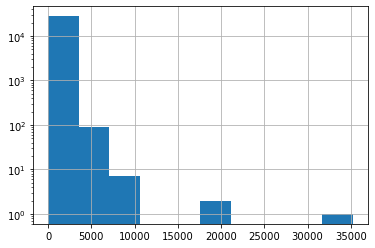

In [4]:
df['len'].hist(log=True)

In [5]:
sorted(df['len'], reverse=True)[:10]

[35213, 18562, 18141, 8797, 8545, 7570, 7406, 7355, 7354, 7158]

In [6]:
long_idx = df.loc[df['len'] > 10000].index
print(long_idx)
df.drop(long_idx, inplace=True)
df.drop(columns=['len'], inplace=True)
df.to_csv('splits/meltome/splits/mixed_split_short.csv', index=False)

Int64Index([1090, 2222, 17601], dtype='int64')
